In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as pre
from sklearn.model_selection import train_test_split

In [158]:
data = pd.read_csv('newhousing.csv')

In [159]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


In [160]:
y.head()

0    0.258610
1   -0.153436
2   -0.640400
3   -1.014987
4   -0.640400
Name: price, dtype: float64

In [161]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [162]:
cor = data.corr()

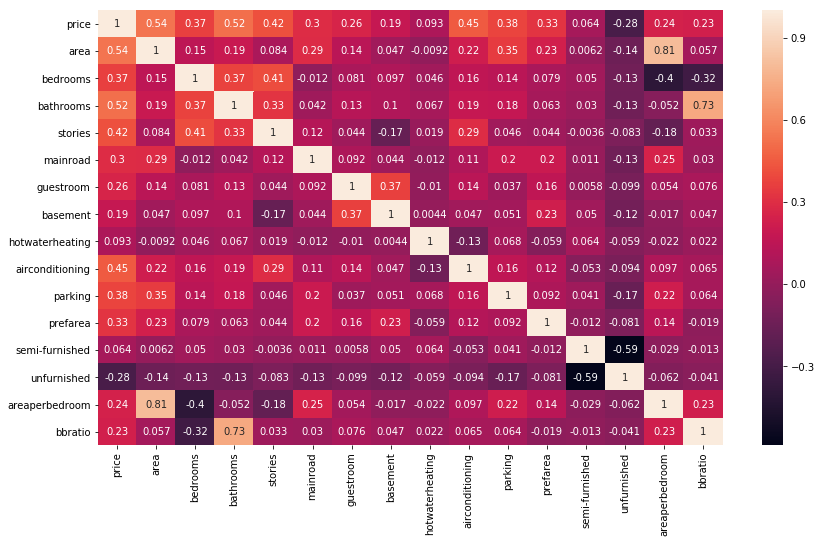

In [163]:
plt.figure(figsize=(14,8))
sns.heatmap(cor,annot=True)
plt.show()

In [164]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_scaled = pd.DataFrame(sc.fit_transform(data))
data_scaled.columns = data.columns
X = data_scaled.drop('price',axis=1)
y = data_scaled.iloc[:,0]

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [166]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()

In [167]:
# Making predictions
y_pred = model.predict(X_test)

In [168]:
# rmse and r-square
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)

In [169]:
mse

0.34659644879225532

In [180]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [181]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [182]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,Feature,PC1,PC2
0,area,0.488610,0.244571
1,bedrooms,0.126546,-0.501502
2,bathrooms,0.289377,-0.316644
3,stories,0.171626,-0.389724
4,mainroad,0.323996,0.132260


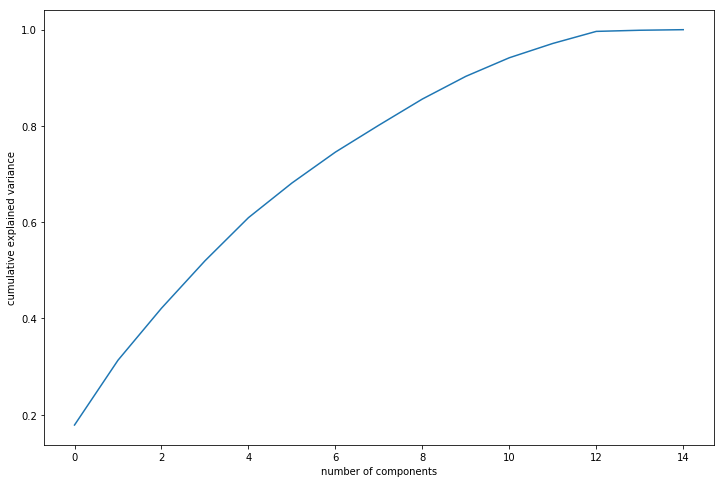

In [183]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [184]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=12)

In [175]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(381, 12)

In [176]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(164, 12)

In [177]:
model_pca = sm.OLS(df_train_pca,y_train).fit()

In [178]:
# Making predictions
y_pred = model_pca.predict(df_test_pca[:,1])

In [179]:
mse = mean_squared_error(y_test,y_pred)

ValueError: y_true and y_pred have different number of output (1!=12)

In [185]:
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Create linear regression object
regrpca = linear_model.LinearRegression()
# Train the model using the principal components of the transformed training sets
regrpca.fit(df_train_pca,y_train)
# Make predictions using the principal components of the transformed testing set
y_pca_pred = regrpca.predict(df_test_pca[:,1])
print("Mean squared error: %.2f" % mean_squared_error(y-test, y_pca_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(ytest, y_pca_pred))

ValueError: Expected 2D array, got 1D array instead:
array=[  7.24705731e-01   1.13985354e+00   1.39646111e+00   1.58340817e+00
  -1.29404183e+00  -1.02480717e+00   1.20313897e-01   2.87821630e+00
  -4.92315187e-01  -6.70512499e-01  -1.22734282e+00   2.16230758e+00
   1.36107460e+00  -6.83169332e-01   1.89971518e-01   7.87409610e-01
  -1.15946168e+00  -1.05301641e+00   7.86727150e-01   4.83282440e-01
   1.68930646e+00   4.21851939e-01  -9.30344436e-01  -3.57294210e+00
   1.97561333e+00   8.30520365e-01   1.41797455e+00  -8.76726356e-01
   1.12702071e-01   2.77490350e-01   2.56004025e+00   7.66136707e-01
   1.56667956e+00  -4.38658005e+00   6.07731903e-01   1.66997497e+00
   7.56846111e-01  -1.52482381e+00  -7.76990479e-01   7.70568507e-01
  -1.06679929e+00  -8.91775525e-02  -1.67788444e+00   1.05292066e+00
  -8.93076521e-01   7.91429559e-01  -1.57488054e+00   1.76351379e-02
  -3.58733475e+00   1.23917053e+00   8.26618016e-01   8.30476394e-01
  -9.57375811e-01   2.32856863e-01  -7.99063073e-01   2.30929867e-01
  -4.61059296e-01   8.13172872e-02  -8.11370507e-01  -4.43482629e+00
   1.24973556e+00  -9.58238647e-01  -4.53870063e-01  -1.30707574e+00
  -1.46571260e+00   6.44847903e-02  -1.52325285e+00   6.15541367e-01
  -1.39493201e+00  -1.26264542e+00   2.05575376e+00   1.63073800e+00
  -2.04399913e-01  -1.07852377e+00  -4.44032576e-01   1.08422466e+00
  -9.49381747e-01  -1.96636259e+00  -2.62525068e-02   3.30272640e+00
  -1.06475325e+00  -2.64628039e+00   6.54398848e-01   8.19322800e-01
   1.04486020e-01   8.68839203e-01  -1.93188055e+00   1.28876201e+00
   8.86141988e-01  -3.33302952e-01  -2.28378368e-03   1.00179244e+00
  -1.25786269e+00   3.65226447e-01  -3.47887109e+00   1.45774992e+00
   4.93347367e-01   6.28412787e-01   9.27904703e-01   3.22970123e-01
   6.47946450e-01  -2.59366767e-01   2.33555160e+00   1.67134319e-01
  -5.16401894e-01  -2.19404858e+00   9.16530001e-01   2.16599224e+00
  -5.52395253e-02   8.98435070e-02   2.46758481e-01   1.61594767e+00
   3.05283417e+00   6.32540471e-01   1.80030750e+00   6.36359612e-01
  -5.57889999e-02   7.91519942e-01   1.17296412e+00  -1.19244717e-01
  -7.70759726e-01  -2.47090994e+00   6.46252897e-01  -4.63099029e-01
   1.35672983e+00  -3.84177639e-01   1.16352340e-01   2.14080152e+00
  -3.54758834e-01   7.26243668e-02  -1.45508009e+00   5.81033880e-01
  -3.21593389e+00   1.72878196e+00   1.85129098e+00  -1.98963143e-01
  -1.94823072e+00   5.36811905e-01  -4.37154422e-01  -8.68484133e-01
   1.36145025e+00  -1.07772209e+00   1.10048518e+00   1.01190264e+00
   2.96008276e-01  -3.61493356e-02   2.67564402e+00  -1.78472907e+00
   1.99021326e-02  -9.39073278e-03   1.54821833e+00   1.69387017e+00
  -1.77655399e+00   3.17932435e+00   3.05182380e-01   2.69437067e-01
  -1.18418551e+00   1.75087922e+00   1.09921049e+00   5.58842774e-02
   3.88699838e-02   8.89013024e-01  -7.51630527e-01  -1.34700858e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.